In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#显示所有列
pd.set_option('display.max_columns', None)
#显示所有行
pd.set_option('display.max_rows', None)
#设置value的显示长度为100，默认为50
pd.set_option('max_colwidth',100)



# 1 . Read File

In [12]:
data = pd.read_csv('F5EVHCP10YR_20191004_TORQUE.csv')

In [13]:
data.head(3)

,STARTTIME,TOOLTIME,CHAMBER,LOTNAME,SLOTNO,SHEETID,RECIPE,POINT,RECIPE_TIME,STEP_NAME,TORQUE
0,2019-10-04 00:02:11.000,2019-10-04 00:02:11.000,AXI_3_U,2019100400,211000,20191004000211,CT780_790,1,1,X,1.990
1,2019-10-04 00:02:11.000,2019-10-04 00:02:11.000,AXI_3_U,2019100400,211000,20191004000211,CT780_790,2,2,X,2.393
2,2019-10-04 00:02:11.000,2019-10-04 00:02:11.000,AXI_3_U,2019100400,211000,20191004000211,CT780_790,3,3,X,2.051


In [14]:
print(data.shape)

(2447747, 11)


# 2. DATA Transfer

In [126]:
#filter
data = data[data['CHAMBER']=='AXI_2_L']
data.head(3)

,STARTTIME,TOOLTIME,CHAMBER,LOTNAME,SLOTNO,SHEETID,RECIPE,POINT,RECIPE_TIME,STEP_NAME,TORQUE
89221,2019-10-04 01:20:13.000,2019-10-04 01:20:13.000,AXI_2_L,2019100401,2013000,20191004012013,CT100_110,1,1,X,1.471
89222,2019-10-04 01:20:13.000,2019-10-04 01:20:13.000,AXI_2_L,2019100401,2013000,20191004012013,CT100_110,2,2,X,4.255
89223,2019-10-04 01:20:13.000,2019-10-04 01:20:13.000,AXI_2_L,2019100401,2013000,20191004012013,CT100_110,3,3,X,4.463


In [127]:
print("Total : ",len(data['STARTTIME'].unique()))
time_list = data['STARTTIME'].unique()
print(time_list)

Total :  3807
['2019-10-04 01:20:13.000' '2019-10-04 01:20:15.000'
 '2019-10-04 01:20:19.000' ... '2019-10-04 23:59:02.000'
 '2019-10-04 23:59:06.000' '2019-10-04 23:59:07.000']


In [130]:
#Initial
n = 153
m = len(data['STARTTIME'].unique())
a = [[0]*n for x in range(m)]
print(type(a))

<class 'list'>


In [136]:
for i in range(m):
    #GETDATA
    temp = data[data['STARTTIME']==time_list[i]]
    temp.reset_index(inplace=True)
    total_point = len(temp)
    #print(time_list[i],' has ', total_point,  ' datas')
    #print(temp.head(3))
    #Common Data
    a[i][0] = temp['STARTTIME'][0]
    a[i][1] = temp['SHEETID'][0]
    a[i][2] = temp['CHAMBER'][0]
    # Point
    for j in range(total_point):
        #print(j,temp['TORQUE'][j])
        a[i][j+3] = temp['TORQUE'][j]
        j = j + 1
        if j > 149:
            break

In [135]:
print(a[1])

['2019-10-04 01:20:15.000', 20191004012015, 'AXI_2_L', 3.065, 4.365, 6.801, 10.543, 15.751, 20.043, 25.146, 31.209, 32.979, 39.444, 42.753, 44.17, 47.271, 53.766999999999996, 56.983999999999995, 64.524, 71.172, 76.288, 82.448, 89.072, 89.23700000000001, 94.07799999999999, 99.939, 100.256, 98.39399999999999, 98.205, 99.81700000000001, 100.26299999999999, 105.281, 103.993, 100.67200000000001, 101.88600000000001, 104.866, 102.772, 101.148, 95.037, 93.382, 94.37700000000001, 93.065, 87.30799999999999, 86.86200000000001, 85.415, 83.47399999999999, 83.052, 80.171, 78.26, 76.392, 74.835, 71.88, 67.735, 69.902, 71.612, 71.215, 70.806, 69.56, 69.86, 68.828, 67.161, 65.494, 64.444, 64.34100000000001, 63.846000000000004, 61.88, 61.715, 61.763999999999996, 61.166000000000004, 59.64, 58.876999999999995, 58.266000000000005, 57.857, 56.708999999999996, 55.067, 52.1, 50.317, 51.135, 50.745, 47.863, 43.651, 40.47, 40.018, 38.065, 33.864000000000004, 29.524, 26.465, 26.783, 25.189, 22.235, 18.651, 15.86

In [137]:
new = pd.DataFrame(a)

In [144]:
col_name = [0]*153
col_name[0]='STARTTIME'
col_name[1]='SHEETID'
col_name[2]='CHAMBER'
for index in range(150):
    col_name[index+3] = ('POINT'+ str(index))

In [145]:
new.columns = col_name

In [151]:
new.head(10)

,STARTTIME,SHEETID,CHAMBER,POINT0,POINT1,POINT2,POINT3,POINT4,POINT5,POINT6,POINT7,POINT8,POINT9,POINT10,POINT11,POINT12,POINT13,POINT14,POINT15,POINT16,POINT17,POINT18,POINT19,POINT20,POINT21,POINT22,POINT23,POINT24,POINT25,POINT26,POINT27,POINT28,POINT29,POINT30,POINT31,POINT32,POINT33,POINT34,POINT35,POINT36,POINT37,POINT38,POINT39,POINT40,POINT41,POINT42,POINT43,POINT44,POINT45,POINT46,POINT47,POINT48,POINT49,POINT50,POINT51,POINT52,POINT53,POINT54,POINT55,POINT56,POINT57,POINT58,POINT59,POINT60,POINT61,POINT62,POINT63,POINT64,POINT65,POINT66,POINT67,POINT68,POINT69,POINT70,POINT71,POINT72,POINT73,POINT74,POINT75,POINT76,POINT77,POINT78,POINT79,POINT80,POINT81,POINT82,POINT83,POINT84,POINT85,POINT86,POINT87,POINT88,POINT89,POINT90,POINT91,POINT92,POINT93,POINT94,POINT95,POINT96,POINT97,POINT98,POINT99,POINT100,POINT101,POINT102,POINT103,POINT104,POINT105,POINT106,POINT107,POINT108,POINT109,POINT110,POINT111,POINT112,POINT113,POINT114,POINT115,POINT116,POINT117,POINT118,POINT119,POINT120,POINT121,POINT122,POINT123,POINT124,POINT125,POINT126,POINT127,POINT128,POINT129,POINT130,POINT131,POINT132,POINT133,POINT134,POINT135,POINT136,POINT137,POINT138,POINT139,POINT140,POINT141,POINT142,POINT143,POINT144,POINT145,POINT146,POINT147,POINT148,POINT149
0,2019-10-04 01:20:13.000,20191004012013,AXI_2_L,1.471,4.255,4.463,9.054,9.676,14.542,21.026,27.100,29.860,35.470,38.730,46.337,54.658,62.308,63.913,72.430,74.066,77.869,80.812,81.477,88.999,90.525,100.128,100.696,101.905,97.387,92.399,89.713,92.717,93.645,96.160,90.733,84.194,81.380,85.714,81.337,79.945,79.017,80.898,85.250,79.884,75.812,69.152,68.382,71.453,74.396,73.101,72.021,71.013,68.736,66.093,63.944,64.847,64.328,62.808,61.575,61.331,60.714,59.805,58.425,57.216,56.978,56.032,55.116,53.816,53.034,53.022,52.204,51.270,50.385,49.524,49.988,48.138,45.403,42.875,41.691,43.089,41.172,37.485,34.200,31.807,32.192,30.482,27.326,23.993,21.483,21.294,19.805,15.989,12.613,10.372,9.878,9.072,7.491,5.598,3.877,2.479,2.137,1.911,1.538,1.538,1.154,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2019-10-04 01:20:15.000,20191004012015,AXI_2_L,3.065,4.365,6.801,10.543,15.751,20.043,25.146,31.209,32.979,39.444,42.753,44.170,47.271,53.767,56.984,64.524,71.172,76.288,82.448,89.072,89.237,94.078,99.939,100.256,98.394,98.205,99.817,100.263,105.281,103.993,100.672,101.886,104.866,102.772,101.148,95.037,93.382,94.377,93.065,87.308,86.862,85.415,83.474,83.052,80.171,78.260,76.392,74.835,71.880,67.735,69.902,71.612,71.215,70.806,69.560,69.860,68.828,67.161,65.494,64.444,64.341,63.846,61.880,61.715,61.764,61.166,59.640,58.877,58.266,57.857,56.709,55.067,52.100,50.317,51.135,50.745,47.863,43.651,40.470,40.018,38.065,33.864,29.524,26.465,26.783,25.189,22.235,18.651,15.867,15.488,14.957,13.028,11.539,10.372,9.854,8.901,7.869,7.735,7.741,7.711,7.711,7.717,7.998,7.582,6.752,6.752,6.386,5.781,5.342,5.098,4.609,3.840,2.613,1.569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2019-10-04 01:20:19.000,20191004012019,AXI_2_L,2.674,5.653,7.289,12.619,17.063,19.237,20.940,25.726,32.900,33.547,39.982,48.260,55.745,60.427,67.515,72.564,81.539,91.038,99.896,103.059,108.791,109.316,115.702,118.877,122.448,128.181,134.506,135.104,130.305,131.441,131.599,127.778,122.491,120.030,117.973,117.930,109.664,102.674,99.219,100.562,93.529,91.758,88.956,84.536,77.985,71.612,68.596,67.527,67.363,66.636,64.133,64.127,64.628,62.900,61.447,60.226,61.618,59.109,54.847,51.490,51.929,51.068,46.337,42.289,40.824,39.518,35.012,30.965,28.755,28.126,25.104,20.653,18.871,18.803,16.117,13.052,10.952,12.558,12.466,11.374,10.256,9.896,9.475,9.505,9.512,9.286,8.779,8.571,8.571,8.144,7.076,7.076,6.160,5.733,4.841,4.121,4.121,2.515,1.465,1.068,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0

# 輸出檔案

In [143]:
new.to_csv('new1.csv')

# PLOT

In [164]:
# how many data want to draw in 1 figure
nDraw = 5

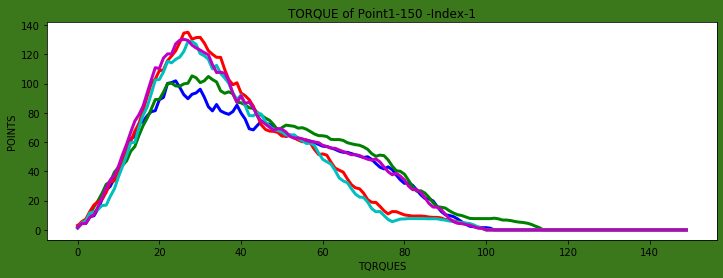

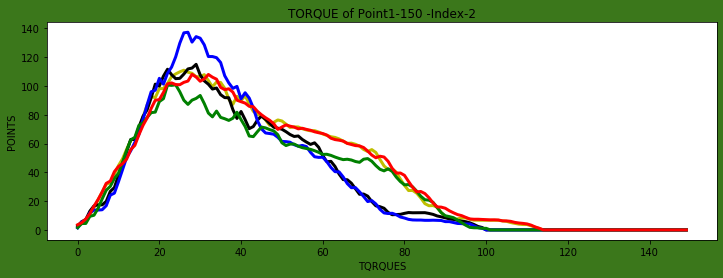

In [175]:
colors = "bgrcmyk"
color_index = 0
pic_index = 0
for c in range(10):
    if c % nDraw == 0:
        pic_index = pic_index + 1
        plt.figure(figsize=(12,4),facecolor='#3B771B')
    plt.title('TORQUE of Point1-150 -Index-' + str(pic_index))    
    plt.ylabel('POINTS')
    plt.xlabel('TQRQUES')
    plt.plot(a[c][3:],label="tets",color=colors[color_index],linewidth=3)
    color_index = color_index + 1
    if color_index > 6 :
        color_index = 0